# K-Means Clustering

## Example with Iris dataset

In [103]:
import numpy as np
import pandas as pd

In [9]:
iris_df = pd.read_csv("iris.csv", index_col=0)
iris_df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa

### Extracting the relevant data
We will perform the clustering as if we do not know which species the instances belong to and hope that the clustering will identify three clusters.

In [107]:
iris_df_nums = iris_df[iris_df.columns[0:4]]
iris_df_nums

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
1             5.1          3.5           1.4          0.2
2             4.9          3.0           1.4          0.2
3             4.7          3.2           1.3          0.2
4             4.6          3.1           1.5          0.2
5             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
146           6.7          3.0           5.2          2.3
147           6.3          2.5           5.0          1.9
148           6.5          3.0           5.2          2.0
149           6.2          3.4           5.4          2.3
150           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

### Scaling the data
For k-means clustering it is vital to scale the data before applying the method

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_nums_scaled = scaler.fit_transform(iris_df_nums)
iris_nums_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Applying k-means clustering

In [116]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_nums_scaled)
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

### Comparing the cluster assignments to actual labels
As the labels are arbitrarily assigned, we inspect the clusters and the actual labels to see what the most suitable mapping would be.

In [147]:
species = np.array(iris_df['Species'])
species

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [143]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Setosa undoubtedly corresponds to 1 (all setosa instances and only setosa instances have been labelled with this value) and let's say that versicolor and virginica are 0 and 2 respectively. We can calculate the accuracy of the assignments.

In [153]:
assignment_mapping_to_species = np.array(['versicolor', 'setosa', 'virginica'])[kmeans.labels_]
assignment_mapping_to_species

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginic

In [150]:
np.count_nonzero(species == assignment_mapping_to_species)/150

0.5

Swapping 'versicolor' and 'virginica' labels will give a much better accuracy.

In [156]:
np.count_nonzero(species == np.array(['virginica', 'setosa', 'versicolor'])[kmeans.labels_])/150

0.8333333333333334

Clustering with some subset of the numerical attributes may give better results but we will not be doing that here.

### Deciding on the best number of clusters
The two most common ways of choosing the number of clusters are the elbow and silhouette methods.

#### Elbow method
For each number of clusters between 1 and 10 we determine the sum of squared distance from (own) centroid. These values are then plotted and the point of the 'elbow' can be considered the best number of clusters. Determining where the elbow is exactly is performed in various ways, including visually-based estimation.

In [163]:
ssdc_lst = []
pc_changes = []
for nc in range(1, 11):
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(iris_nums_scaled)
    ssdc_lst.append(kmeans.inertia_)
    if (nc != 1):
        pc_changes.append((ssdc_lst[-1] - ssdc_lst[-2])/ssdc_lst[-2] * -100)

ssdc_lst

[599.9999999999999,
 222.36170496502294,
 139.82049635974968,
 114.09748520602311,
 90.80759161913355,
 80.03687480296507,
 71.94569816850404,
 62.97004489135638,
 54.47655881605241,
 47.261862542339834]

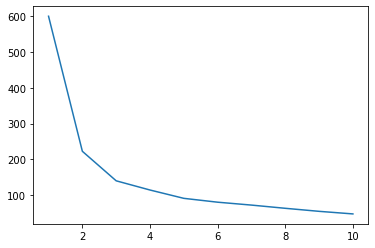

In [161]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), ssdc_lst)
plt.show()

In [164]:
pc_changes

[62.939715839162844,
 37.12024452153613,
 18.397167670999266,
 20.41227599787634,
 11.861031246531857,
 10.109311057409363,
 12.475594101715126,
 13.488137240425937,
 13.243671095441234]

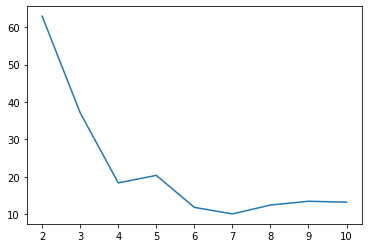

In [165]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), pc_changes)
plt.show()

#### Silhouette method
The silhouette score is calculated for each k. The highest value indicates the best cluster count.

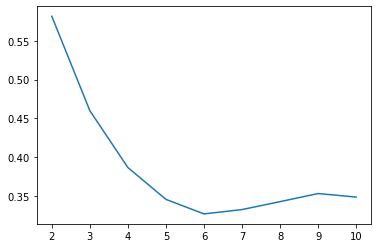

In [170]:
from sklearn.metrics import silhouette_score

silhouette_list = []
for nc in range(2, 11):
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(iris_nums_scaled)
    silhouette_list.append (silhouette_score(iris_nums_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_list)
plt.show()

The silhouette method would indicate that two clusters are the best choice and knowing the data we can understand why: there is some overlap between versicolor and virginica attribute values, which does not make them clean clusters.